Ce notebook vise à traiter les datasets concernant les matchs de tennis, les organiser et faire des modifications/néttoyages nécessaires selon le besoin 

1.Importation des librairies nécessaires 

In [2]:
import pandas as pd 
import missingno as msno
import re
import matplotlib.pyplot as plt

Deux premiers datasets 'Aust-Open-champs' hommes et femmes 

In [36]:
#Lecture des datasets 
df1 = pd.read_csv('Aust_Open_champs_69_21.csv')
df1.head(5)

,Year,Champion,Seed_Champion,Ctry_Champion,Runner-up,Seed_Runner-up,Ctry_Runner-up,Score in the Final
0,1969,Rod Laver,1,AUS,Andrés Gimeno,9,ESP,"6–3, 6–4, 7–5"
1,1970,Arthur Ashe,4,USA,Dick Crealy,12,AUS,"6–4, 9–7, 6–2"
2,1971,Ken Rosewall,2,AUS,Arthur Ashe,3,USA,"6–1, 7–5, 6–3"
3,1972,Ken Rosewall,2,AUS,Malcolm Anderson,8,AUS,"7–6(7–2), 6–3, 7–5"
4,1973,John Newcombe,2,AUS,Onny Parun,12,NZL,"6–3, 6–7, 7–5, 6–1"


Analyse du df1 'men'

In [37]:
#Vérifier si il y a des colonnes vides 
colonnes_vides = df1.columns[df1.isnull().all()].tolist()
print(colonnes_vides)

[]


In [38]:
#ajout deux lignes 2022 et 2023 
data_to_add = {
    'Year': [2022, 2023],
    'Champion': ['Novak Djokovic', 'Novak Djokovic'],
    'Seed_Champion': [1, 1],
    'Ctry_Champion': ['SRB', 'SRB'],
    'Runner-up': ['Nick Kyrgios', 'Jannik Sinner'],
    'Seed_Runner-up': [2, 3],
    'Ctry_Runner-up': ['AUS', 'ITA'],
    'Score in the Final': ['4-6, 6-3, 6-4', '6-3, 6-3, 6-3']
}
df_to_add = pd.DataFrame(data_to_add)
df1 = pd.concat([df1, df_to_add], ignore_index=True)
df1

,Year,Champion,Seed_Champion,Ctry_Champion,Runner-up,Seed_Runner-up,Ctry_Runner-up,Score in the Final
0,1969,Rod Laver,1,AUS,Andrés Gimeno,9,ESP,"6–3, 6–4, 7–5"
1,1970,Arthur Ashe,4,USA,Dick Crealy,12,AUS,"6–4, 9–7, 6–2"
2,1971,Ken Rosewall,2,AUS,Arthur Ashe,3,USA,"6–1, 7–5, 6–3"
3,1972,Ken Rosewall,2,AUS,Malcolm Anderson,8,AUS,"7–6(7–2), 6–3, 7–5"
4,1973,John Newcombe,2,AUS,Onny Parun,12,NZL,"6–3, 6–7, 7–5, 6–1"
5,1974,Jimmy Connors,2,USA,Phil Dent,9,AUS,"7–6(9–7), 6–4, 4–6, 6–3"
6,1975,John Newcombe,2,AUS,Jimmy Connors,1,USA,"7–5, 3–6, 6–4, 7–6(9–7)"
7,1976,Mark Edmondson,0,AUS,John Newcombe,2,AUS,"6–7, 6–3, 7–6, 6–1"
8,1977,Roscoe Tanner,2,USA,Guillermo Vilas,1,ARG,"6–3, 6–3, 6–3"
9,1977,Vitas Gerulaitis,1,USA,John Lloyd,0,GBR,"6–3, 7–6(7–1), 5–7, 3–6, 6–2"


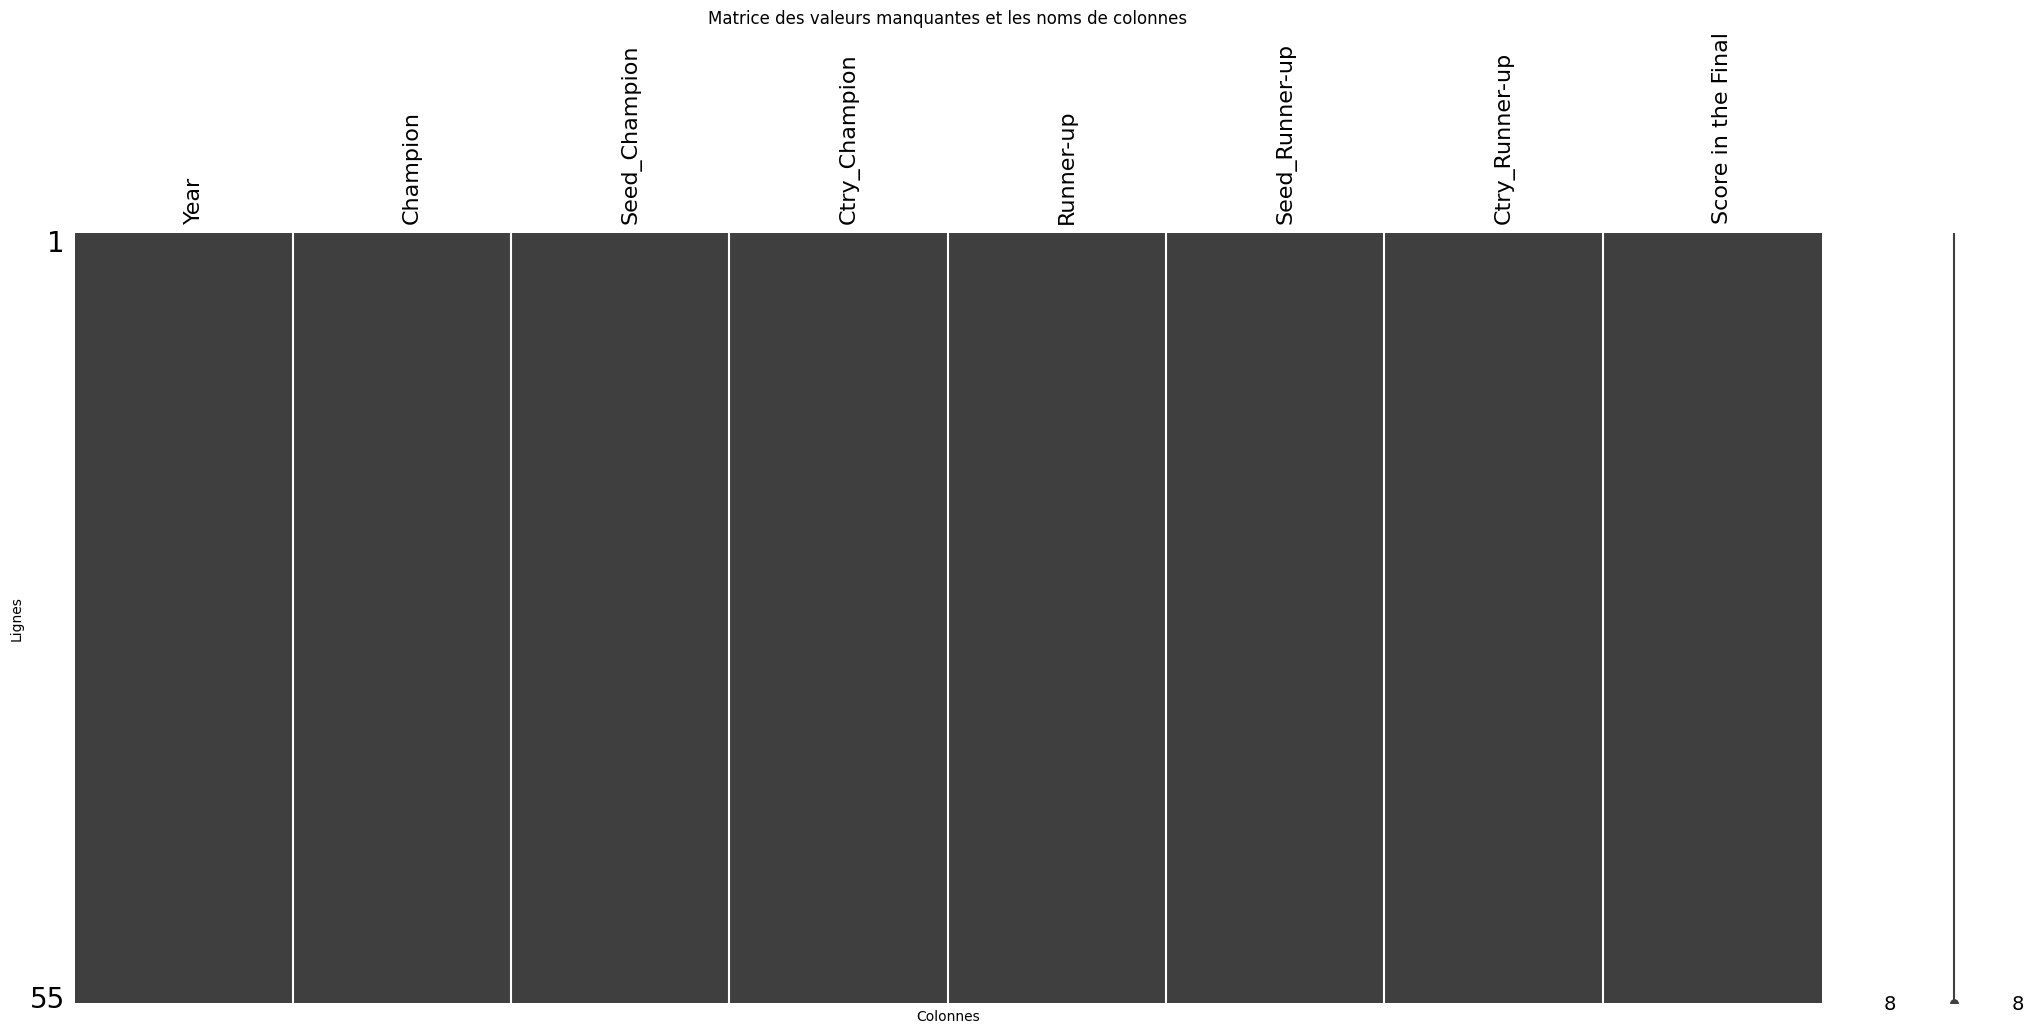

In [39]:
#Vérifier les données manquantes 
def profil_données(nom_data):  
    msno.matrix(nom_data)
    noms_colonnes = nom_data.columns
    
    plt.title("Matrice des valeurs manquantes et les noms de colonnes")
    plt.xlabel("Colonnes")
    plt.ylabel("Lignes")
    plt.xticks(ticks=range(len(noms_colonnes)), labels=noms_colonnes, rotation=90)
    plt.show()
profil_données(df1)

In [40]:
#Vérifier les types des données 
df1.dtypes

Year                   int64
Champion              object
Seed_Champion          int64
Ctry_Champion         object
Runner-up             object
Seed_Runner-up         int64
Ctry_Runner-up        object
Score in the Final    object
dtype: object

In [41]:
# Nettoyage de la colonne 'Score in the Final'
df1['Score in the Final'] = df1['Score in the Final'].str.split(',').apply(lambda x: ','.join(x[:3]))
df1['Score in the Final'] = df1['Score in the Final'].str.replace(r'\s*\([^()]*\)', '', regex=True)
df1['Score in the Final'] = df1['Score in the Final'].str.replace(r'\bretired\b', '', regex=True)
df1.head()

,Year,Champion,Seed_Champion,Ctry_Champion,Runner-up,Seed_Runner-up,Ctry_Runner-up,Score in the Final
0,1969,Rod Laver,1,AUS,Andrés Gimeno,9,ESP,"6–3, 6–4, 7–5"
1,1970,Arthur Ashe,4,USA,Dick Crealy,12,AUS,"6–4, 9–7, 6–2"
2,1971,Ken Rosewall,2,AUS,Arthur Ashe,3,USA,"6–1, 7–5, 6–3"
3,1972,Ken Rosewall,2,AUS,Malcolm Anderson,8,AUS,"7–6, 6–3, 7–5"
4,1973,John Newcombe,2,AUS,Onny Parun,12,NZL,"6–3, 6–7, 7–5"


Nettoyage de la colonne 'Score in the Final' 

In [42]:
#Fonction pour diviser la colonne et créer les nouvelles colonnes voulue 
def split_scores(df):
    
    champion_scores = []
    runner_up_scores = []
    for index, row in df.iterrows():
        scores = row['Score in the Final'].split(',')
        if len(scores) == 2:
            score1, score2 = scores
            score1 = score1.replace('-', '–')  
            score2 = score2.replace('-', '–')
            score1_champion, score1_runner_up = map(int, score1.split('–'))
            score2_champion, score2_runner_up = map(int, score2.split('–'))
            score3_champion = score3_runner_up = None
        elif len(scores) == 3:  
            score1, score2, score3 = scores
            score1 = score1.replace('-', '–')  
            score2 = score2.replace('-', '–')
            score3 = score3.replace('-', '–')
            score1_champion, score1_runner_up = map(int, score1.split('–'))
            score2_champion, score2_runner_up = map(int, score2.split('–'))
            score3_champion, score3_runner_up = map(int, score3.split('–'))
        else:
            score1_champion = score2_champion = score3_champion = None
            score1_runner_up = score2_runner_up = score3_runner_up = None
        
        champion_scores.append([score1_champion, score2_champion, score3_champion])
        runner_up_scores.append([score1_runner_up, score2_runner_up, score3_runner_up])

    df['Score1_Champion'] = [score[0] for score in champion_scores]
    df['Score2_Champion'] = [score[1] for score in champion_scores]
    df['Score3_Champion'] = [score[2] for score in champion_scores]
    df['Score1_Runner-up'] = [score[0] for score in runner_up_scores]
    df['Score2_Runner-up'] = [score[1] for score in runner_up_scores]
    df['Score3_Runner-up'] = [score[2] for score in runner_up_scores]
    return df
df1 = split_scores(df1) 
print("Dimensions de df1 :", df1.shape)
df1.head()

Dimensions de df1 : (55, 14)


,Year,Champion,Seed_Champion,Ctry_Champion,Runner-up,Seed_Runner-up,Ctry_Runner-up,Score in the Final,Score1_Champion,Score2_Champion,Score3_Champion,Score1_Runner-up,Score2_Runner-up,Score3_Runner-up
0,1969,Rod Laver,1,AUS,Andrés Gimeno,9,ESP,"6–3, 6–4, 7–5",6,6,7,3,4,5
1,1970,Arthur Ashe,4,USA,Dick Crealy,12,AUS,"6–4, 9–7, 6–2",6,9,6,4,7,2
2,1971,Ken Rosewall,2,AUS,Arthur Ashe,3,USA,"6–1, 7–5, 6–3",6,7,6,1,5,3
3,1972,Ken Rosewall,2,AUS,Malcolm Anderson,8,AUS,"7–6, 6–3, 7–5",7,6,7,6,3,5
4,1973,John Newcombe,2,AUS,Onny Parun,12,NZL,"6–3, 6–7, 7–5",6,6,7,3,7,5


Lecture dateset pour les femmes 


In [43]:
#Lecture des datasets 
df2 = pd.read_csv('Aust_Open_champs_69_21_wom.csv')
df2.head(10)

,Year,Champion,Seed_Champion,Ctry_Champion,Runner-up,Seed_Runner-up,Ctry_Runner-up,Score in the Final
0,1969,Margaret Court,2,AUS,Billie Jean King,1,USA,"6–4, 6–1"
1,1970,Margaret Court,1,AUS,Kerry Melville,2,AUS,"6–1, 6–3"
2,1971,Margaret Court,1,AUS,Evonne Goolagong,2,AUS,"2–6, 7–6(7–0), 7–5"
3,1972,Virginia Wade,2,GBR,Evonne Goolagong,1,AUS,"6–4, 6–4"
4,1973,Margaret Court,1,AUS,Evonne Goolagong,2,AUS,"6–4, 7–5"
5,1974,Evonne Goolagong,2,AUS,Chris Evert,1,USA,"7–6(7–5), 4–6, 6–0"
6,1975,Evonne Goolagong,3,AUS,Martina Navratilova,8,TCH,"6–3, 6–2"
7,1976,Evonne Goolagong,1,AUS,Renáta Tomanová,5,TCH,"6–2, 6–2"
8,1977,Kerry Melville Reid,2,AUS,Dianne Fromholtz,1,AUS,"7–5, 6–2"
9,1977,Evonne Goolagong,1,AUS,Helen Gourlay,5,AUS,"6–3, 6–0"


2.Nettoyage du dataset 'women'

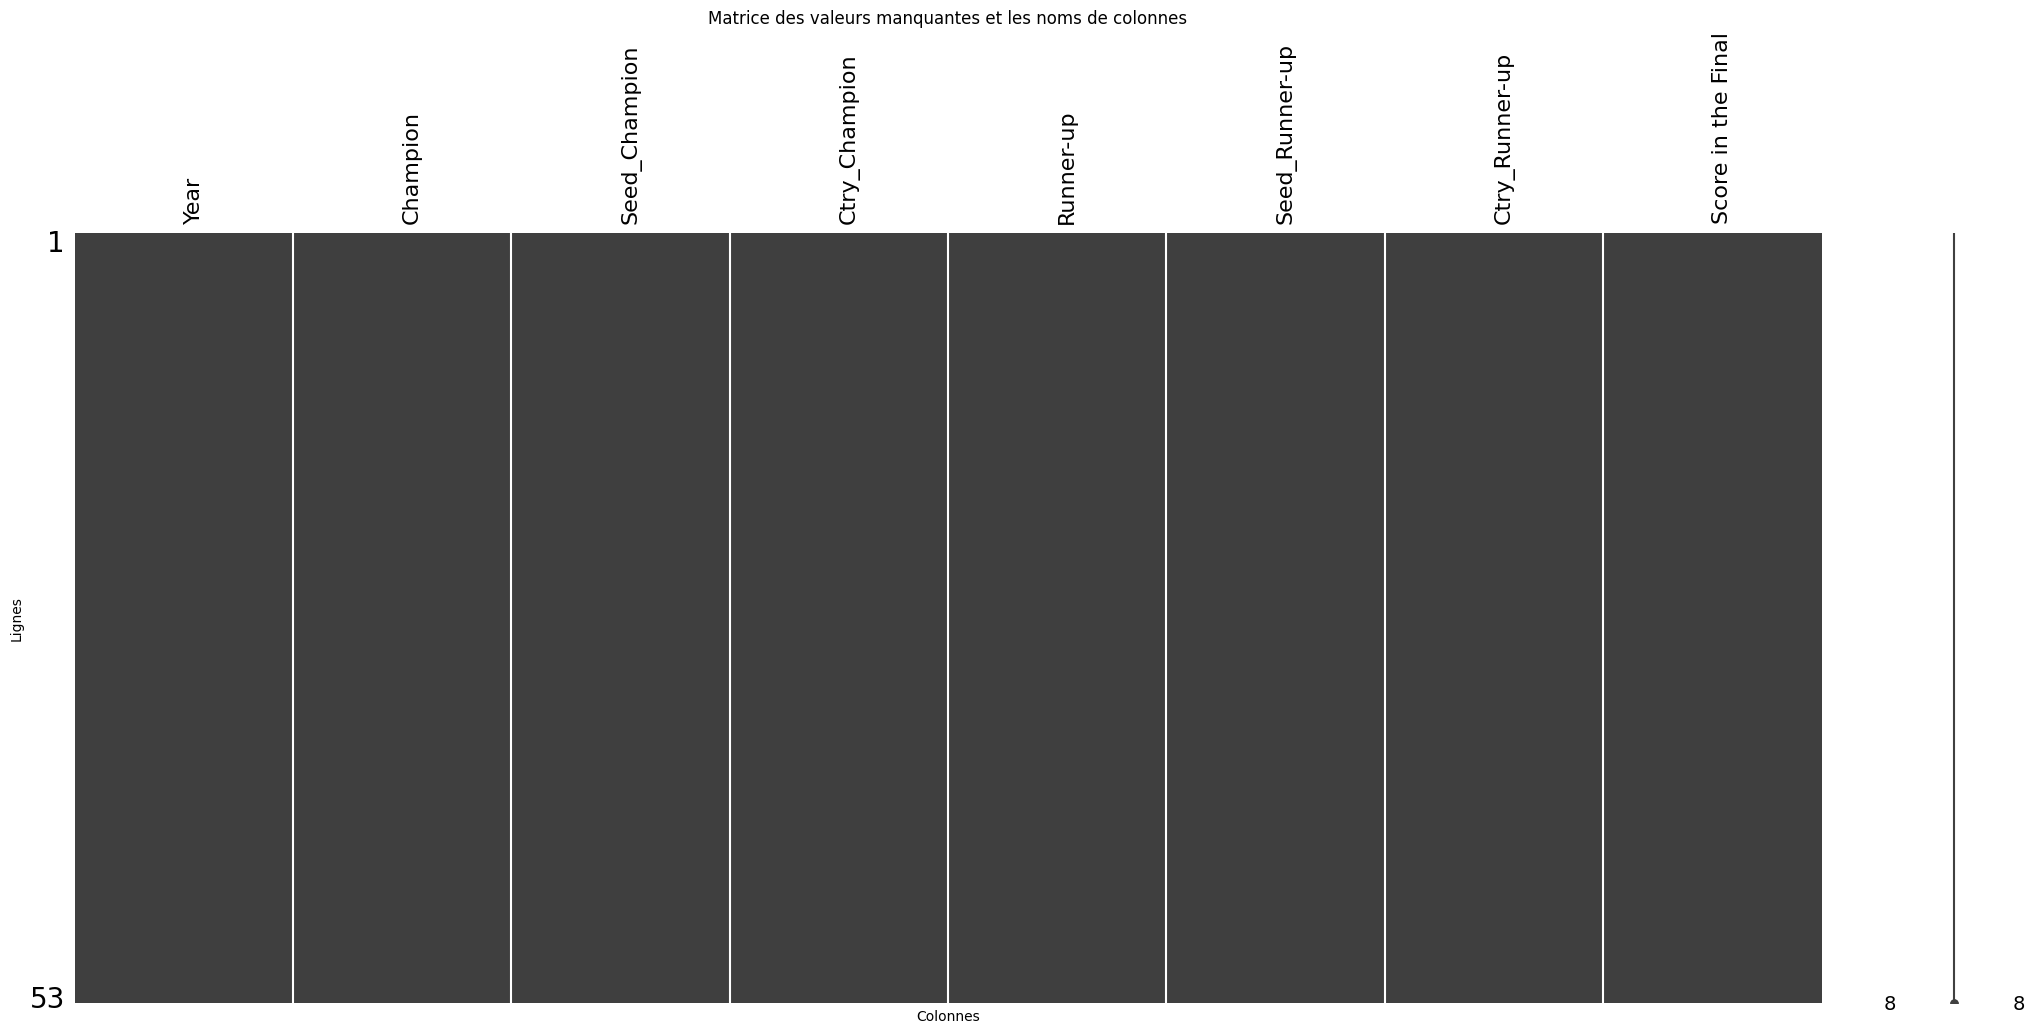

Colonnes vides: []
Types des données (ordonnés):
Year                   int64
Champion              object
Seed_Champion          int64
Ctry_Champion         object
Runner-up             object
Seed_Runner-up         int64
Ctry_Runner-up        object
Score in the Final    object
dtype: object


In [11]:
def check_empty_columns(df):
    return df.columns[df.isnull().all()].tolist()

def plot_missing_data_profile(df):
    msno.matrix(df)
    plt.title("Matrice des valeurs manquantes et les noms de colonnes")
    plt.xlabel("Colonnes")
    plt.ylabel("Lignes")
    plt.xticks(ticks=range(len(df.columns)), labels=df.columns, rotation=90)
    plt.show()


empty_columns = check_empty_columns(df2)
plot_missing_data_profile(df2)
print("Colonnes vides:", empty_columns)

data_types_ordered = df2[df2.columns].dtypes
print("Types des données (ordonnés):")
print(data_types_ordered)

In [12]:
# Nettoyage de la colonne 'Score in the Final' pour obtenir deux scores
df2['Score in the Final'] = df2['Score in the Final'].str.split(',').apply(lambda x: ','.join(x[:2]))
df2['Score in the Final'] = df2['Score in the Final'].str.replace(r'\s*\([^()]*\)', '', regex=True)
df2['Score in the Final'] = df2['Score in the Final'].str.replace(r'\bretired\b', '', regex=True)
df2.head(10)

,Year,Champion,Seed_Champion,Ctry_Champion,Runner-up,Seed_Runner-up,Ctry_Runner-up,Score in the Final
0,1969,Margaret Court,2,AUS,Billie Jean King,1,USA,"6–4, 6–1"
1,1970,Margaret Court,1,AUS,Kerry Melville,2,AUS,"6–1, 6–3"
2,1971,Margaret Court,1,AUS,Evonne Goolagong,2,AUS,"2–6, 7–6"
3,1972,Virginia Wade,2,GBR,Evonne Goolagong,1,AUS,"6–4, 6–4"
4,1973,Margaret Court,1,AUS,Evonne Goolagong,2,AUS,"6–4, 7–5"
5,1974,Evonne Goolagong,2,AUS,Chris Evert,1,USA,"7–6, 4–6"
6,1975,Evonne Goolagong,3,AUS,Martina Navratilova,8,TCH,"6–3, 6–2"
7,1976,Evonne Goolagong,1,AUS,Renáta Tomanová,5,TCH,"6–2, 6–2"
8,1977,Kerry Melville Reid,2,AUS,Dianne Fromholtz,1,AUS,"7–5, 6–2"
9,1977,Evonne Goolagong,1,AUS,Helen Gourlay,5,AUS,"6–3, 6–0"


In [13]:
def split_scores(df):
    champion_scores = []
    runner_up_scores = []
    for scores in df['Score in the Final'].str.split(','):
        if len(scores) == 2:
            score1_parts = scores[0].split('–')
            score2_parts = scores[1].split('–')
            
            if len(score1_parts) == 2 and len(score2_parts) == 2:
                score1_champion = int(score1_parts[0])
                score1_runner_up = int(score1_parts[1])
                score2_champion = int(score2_parts[0])
                score2_runner_up = int(score2_parts[1])
            else:
                score1_champion, score1_runner_up, score2_champion, score2_runner_up = None, None, None, None
            
        else:
            score1_champion, score1_runner_up, score2_champion, score2_runner_up = None, None, None, None
        
        champion_scores.append([score1_champion, score2_champion])
        runner_up_scores.append([score1_runner_up, score2_runner_up])
    
    df['Score1_Champion'] = [score[0] for score in champion_scores]
    df['Score2_Champion'] = [score[1] for score in champion_scores]
    df['Score1_Runner-up'] = [score[0] for score in runner_up_scores]
    df['Score2_Runner-up'] = [score[1] for score in runner_up_scores]
    return df

# Appeler la fonction sur le DataFrame df2
df2 = split_scores(df2)
print("Dimensions de df2 :", df2.shape)
df2.head(5)

Dimensions de df2 : (53, 12)


,Year,Champion,Seed_Champion,Ctry_Champion,Runner-up,Seed_Runner-up,Ctry_Runner-up,Score in the Final,Score1_Champion,Score2_Champion,Score1_Runner-up,Score2_Runner-up
0,1969,Margaret Court,2,AUS,Billie Jean King,1,USA,"6–4, 6–1",6.0,6.0,4.0,1.0
1,1970,Margaret Court,1,AUS,Kerry Melville,2,AUS,"6–1, 6–3",6.0,6.0,1.0,3.0
2,1971,Margaret Court,1,AUS,Evonne Goolagong,2,AUS,"2–6, 7–6",2.0,7.0,6.0,6.0
3,1972,Virginia Wade,2,GBR,Evonne Goolagong,1,AUS,"6–4, 6–4",6.0,6.0,4.0,4.0
4,1973,Margaret Court,1,AUS,Evonne Goolagong,2,AUS,"6–4, 7–5",6.0,7.0,4.0,5.0


téléchargement des nouveaux csv nettoyés 

In [44]:
df1.to_csv('Openchamps_men_nettoye.csv')
df2.to_csv('Openchamps_women_nettoye.csv')

---------------------------------------------------------------------------  FIN DATASETS OPENCHAMPS --------------------------------------------------------------------------------------------------------

2. Dataset 'serve_times' 

In [3]:
df_serve = pd.read_csv('serve_times.csv')
df_serve

,server,seconds_before_next_point,day,opponent,game_score,set,game
0,Nicolas Almagro,22,28-May-15,Rafael Nadal,15-30,1,0-0
1,Nicolas Almagro,19,28-May-15,Rafael Nadal,15-40,1,0-0
2,Nicolas Almagro,23,28-May-15,Rafael Nadal,30-40,1,0-0
3,Nicolas Almagro,24,28-May-15,Rafael Nadal,Deuce,1,0-0
4,Nicolas Almagro,19,28-May-15,Rafael Nadal,Ad-in,1,0-0
...,...,...,...,...,...,...,...
115,Nick Kyrgios,13,30-May-15,Andy Murray,Ad-out,3,3-3
116,Nick Kyrgios,9,30-May-15,Andy Murray,Deuce,3,3-3
117,Nick Kyrgios,12,30-May-15,Andy Murray,Ad-in,3,3-3
118,Nick Kyrgios,24,30-May-15,Andy Murray,Deuce,3,3-3


------------------------------------------------------------------------------ Fin server ------------------------------------------------------------------------------------

3. 'KaggleMatches'

In [5]:
df_mtc = pd.read_csv('KaggleMatches.csv')
df_mtc.head()

C:\Users\sonia\AppData\Local\Temp\ipykernel_21852\150604984.py:1: DtypeWarning: Columns (3,8,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df_mtc = pd.read_csv('KaggleMatches.csv')


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,league
0,2019-M020,Brisbane,Hard,32,A,2018-12-31,300,105453,2.0,NaN,...,34.0,20.0,14.0,10.0,15.0,9.0,3590.0,16.0,1977.0,atp
1,2019-M020,Brisbane,Hard,32,A,2018-12-31,299,106421,4.0,NaN,...,36.0,7.0,10.0,10.0,13.0,16.0,1977.0,239.0,200.0,atp
2,2019-M020,Brisbane,Hard,32,A,2018-12-31,298,105453,2.0,NaN,...,15.0,6.0,8.0,1.0,5.0,9.0,3590.0,40.0,1050.0,atp
3,2019-M020,Brisbane,Hard,32,A,2018-12-31,297,104542,NaN,PR,...,38.0,9.0,11.0,4.0,6.0,239.0,200.0,31.0,1298.0,atp
4,2019-M020,Brisbane,Hard,32,A,2018-12-31,296,106421,4.0,NaN,...,46.0,19.0,15.0,2.0,4.0,16.0,1977.0,18.0,1855.0,atp


In [6]:
df_mtc = df_mtc.dropna(axis=1, how='all')
df_mtc = df_mtc.fillna(0)


In [7]:
df_mtc.to_csv('KaggleMatches_cleaned.csv', index=False)

---------------------------------------------------------------------- FIN KAGGLEMATCHS -----------------------------------------------------------------------------------

4. Fusion Datasets French OpenChamps, Grand Slam, 

In [4]:
df_mens = pd.read_csv('French Open Champs Men 68_21.csv')
df_womens = pd.read_csv('French Open Champs Women 68_21.csv')
df_merged = pd.concat([df_mens, df_womens])
df_merged.to_csv('French_OpenChamps_Singles.csv', index=False)

In [5]:
df_gs_men = pd.read_csv('Grand Slam Champs Men 68_21.csv')
df_gs_women = pd.read_csv('Grand Slam Champs Women 68_21.csv')
df_merged_gs = pd.concat([df_gs_men, df_gs_women])
df_merged_gs.to_csv('Grand_Slam_OpenChamps.csv', index=False)

In [10]:
df_us_men = pd.read_csv('US Open Champs Men 68_21.csv')
df_us_women = pd.read_csv('US Open Champs Women 68_21.csv')
df_merged_us = pd.concat([df_us_men, df_us_women])
df_merged_us.to_csv('US_OpenChamps.csv', index=False)

In [26]:
df_wb_men = pd.read_csv('Wimbledon Champs Men 68_21.csv')
df_wb_women = pd.read_csv('Wimbledon Champs Women 68_21.csv')
df_merged_wb = pd.concat([df_us_men, df_wb_women])
df_merged_wb.to_csv('Wimbledon Champs.csv', index=False)

------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [25]:
df_fr = pd.read_csv('French_OpenChamps_Singles.csv')
df_gs = pd.read_csv('Grand_Slam_OpenChamps.csv')
df_us = pd.read_csv('US_OpenChamps.csv')
df_


,Year,Champion,Seed_Champion,Ctry_Champion,Runner-up,Seed_Runner-up,Ctry_Runner-up,Score in the Final
0,1968,Arthur Ashe,5,USA,Tom Okker,8,NED,"14–12, 5–7, 6–3, 3–6, 6–3"
1,1969,Rod Laver,1,AUS,Tony Roche,3,AUS,"7–9, 6–1, 6–2, 6–2"
2,1970,Ken Rosewall,3,AUS,Tony Roche,4,AUS,"2–6, 6–4, 7–6(5–2), 6–3[g]"
3,1971,Stan Smith,2,USA,Jan Kodeš,0,TCH,"3–6, 6–3, 6–2, 7–6(5–3)"
4,1972,Ilie Năstase,4,ROU,Arthur Ashe,6,USA,"3–6, 6–3, 6–7(1–5), 6–4, 6–3"
...,...,...,...,...,...,...,...,...
101,2016,Angelique Kerber,2,GER,Karolína Plíšková,10,CZE,"6–3, 4–6, 6–4"
102,2017,Sloane Stephens,888,USA,Madison Keys,15,USA,"6–3, 6–0"
103,2018,Naomi Osaka,20,JPN,Serena Williams,17,USA,"6-2, 6-4"
104,2019,Bianca Andreescu,15,CAN,Serena Williams,8,USA,"6-3, 7-5"
